# Analyzing Player Performances

In [1]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_rows', None)  

In [2]:
#Combining All Offensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Offensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedOffensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [3]:
#Combining All Defensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Defensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedDefensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [4]:
#Combining All Passing Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Passing*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedPassingPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [5]:
#Combining All Summary Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Summary*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
    li.append(individualOffensivePlayerDataframe)

combinedSummaryPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [103]:
combinedOffensivePlayerDataframe.head()

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Arjen Robben,Bayern Munich,26,"M(CLR),FW",18,1779,16,6,3.4,1.8,4,2.2,0.3,2.1,-,8.18,Bundesliga,2009
1,Stefan Kießling,Bayer Leverkusen,26,FW,33,2924,21,5,3,1.6,1.1,3.1,1.8,2.2,-,7.79,Bundesliga,2009
2,Zvjezdan Misimovic,Wolfsburg,28,"AM(C),FW",31,2768,10,13,2.4,3.3,1.5,2.1,0.3,3.1,-,7.74,Bundesliga,2009
3,Edin Dzeko,Wolfsburg,24,FW,33,3003,22,7,4.5,1.1,2,1.7,1.6,2.9,-,7.73,Bundesliga,2009
4,Claudio Pizarro,Werder Bremen,31,"AM(C),FW",23,2130,16,2,2.6,1.3,1.2,1.2,1.4,3.1,-,7.63,Bundesliga,2009


In [10]:
#combining all the DFs'

combinedPlayerDataframe = pd.concat([combinedOffensivePlayerDataframe, combinedDefensivePlayerDataframe, combinedPassingPlayerDataframe, combinedSummaryPlayerDataframe], axis=1)

combinedPlayerDataframe = combinedPlayerDataframe.loc[:,~combinedPlayerDataframe.columns.duplicated()]

#Removing all the goal keepers to test whether it improves the accuracy of the model.
combinedFieldPlayersDf = combinedPlayerDataframe[combinedPlayerDataframe.Position != 'GK']

#Removing field players who have played less than 10 matches
#combinedProperFieldPlayersDf = combinedFieldPlayersDf[~(combinedFieldPlayersDf['Apps'] < 8)]  

## Testing Regression

In [105]:
#list column names
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedSummaryPlayerDataframe.columns)] # 59% 
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedPlayerDataframe.columns)] # 75%
[(f"column {i+1} : {column}") for i, column in enumerate(combinedFieldPlayersDf.columns)] # 80%
#[(f"column {i+1} : {column}") for i, column in enumerate(combinedProperFieldPlayersDf.columns)] 

['column 1 : Name',
 'column 2 : Team',
 'column 3 : Age',
 'column 4 : Position',
 'column 5 : Apps',
 'column 6 : Minutes',
 'column 7 : Total goals',
 'column 8 : Total Assists',
 'column 9 : Shots per game',
 'column 10 : Key passes per game',
 'column 11 : Dribbles per game',
 'column 12 : Fouled per game',
 'column 13 : Offsides per game',
 'column 14 : Dispossessed per game',
 'column 15 : Bad control per game',
 'column 16 : Rating',
 'column 17 : League',
 'column 18 : Season',
 'column 19 : Tackles per game',
 'column 20 : Interceptions per game',
 'column 21 : Fouls per game',
 'column 22 : Clearances per game',
 'column 23 : Dribbled past per game',
 'column 24 : Outfield blocks per game',
 'column 25 : Own goals',
 'column 26 : Passes per game',
 'column 27 : Pass success percentage',
 'column 28 : Crosses per game',
 'column 29 : Long balls per game',
 'column 30 : Through balls per game',
 'column 31 : Total Goals',
 'column 32 : Yellow cards',
 'column 33 : Red cards',


In [106]:
#Remove unwanted columns
#finalDf = combinedSummaryPlayerDataframe.drop(["Team", "Position", "League", "Season"], axis = 1)
finalDf = combinedFieldPlayersDf.drop(["Team", "Position", "League", "Season"], axis = 1)
# finalDf = combinedFieldPlayersDf
#finalDf = combinedProperFieldPlayersDf.drop(["Team", "Position", "League", "Season"], axis = 1)

In [107]:
#replace - fields with 0
finalDf = finalDf.replace('-', 0)

In [108]:
#checks if duplicates exists
finalDf.duplicated().any()

False

In [109]:
#removes NaN values
# finalDf = finalDf.dropna()
finalDf = finalDf.fillna(0)

In [110]:
#check if null value exitst
finalDf.isnull().any()

Name                        False
Age                         False
Apps                        False
Minutes                     False
Total goals                 False
Total Assists               False
Shots per game              False
Key passes per game         False
Dribbles per game           False
Fouled per game             False
Offsides per game           False
Dispossessed per game       False
Bad control per game        False
Rating                      False
Tackles per game            False
Interceptions per game      False
Fouls per game              False
Clearances per game         False
Dribbled past per game      False
Outfield blocks per game    False
Own goals                   False
Passes per game             False
Pass success percentage     False
Crosses per game            False
Long balls per game         False
Through balls per game      False
Total Goals                 False
Yellow cards                False
Red cards                   False
Aerials won pe

In [111]:
#returns DF shape
finalDf.shape

(27918, 31)

In [112]:
#check column data types
finalDf.dtypes

Name                         object
Age                           int64
Apps                          int64
Minutes                       int64
Total goals                  object
Total Assists                object
Shots per game               object
Key passes per game          object
Dribbles per game            object
Fouled per game              object
Offsides per game            object
Dispossessed per game        object
Bad control per game         object
Rating                      float64
Tackles per game             object
Interceptions per game       object
Fouls per game               object
Clearances per game          object
Dribbled past per game       object
Outfield blocks per game     object
Own goals                    object
Passes per game              object
Pass success percentage      object
Crosses per game             object
Long balls per game          object
Through balls per game       object
Total Goals                  object
Yellow cards                

In [113]:
#replace Name column with dummy data for each different player names
finalDf = pd.get_dummies(finalDf, columns=["Name"])
# finalDf = pd.get_dummies(finalDf, columns=["Name", "Team", "Position", "League", "Season"])
finalDf.dtypes

Age                     int64
Apps                    int64
Minutes                 int64
Total goals            object
Total Assists          object
                        ...  
Name_Óscar Serrano      uint8
Name_Óscar Trejo        uint8
Name_Ömer Toprak        uint8
Name_Özkan Yildirim     uint8
Name_Ümit Korkmaz       uint8
Length: 8605, dtype: object

In [114]:
#convert object data types to flot (except for names)
cols = finalDf.select_dtypes(exclude=['uint8']).columns
finalDf[cols] = finalDf[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

finalDf.dtypes

Age                    float32
Apps                   float32
Minutes                float32
Total goals            float32
Total Assists          float32
                        ...   
Name_Óscar Serrano       uint8
Name_Óscar Trejo         uint8
Name_Ömer Toprak         uint8
Name_Özkan Yildirim      uint8
Name_Ümit Korkmaz        uint8
Length: 8605, dtype: object

In [115]:
finalDf.head()

,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,...,Name_Óscar Díaz,Name_Óscar Melendo,Name_Óscar Plano,Name_Óscar Rodríguez,Name_Óscar Romero,Name_Óscar Serrano,Name_Óscar Trejo,Name_Ömer Toprak,Name_Özkan Yildirim,Name_Ümit Korkmaz
0,26.0,18.0,1779.0,16.0,6.0,3.4,1.8,4.0,2.2,0.3,...,0,0,0,0,0,0,0,0,0,0
1,26.0,33.0,2924.0,21.0,5.0,3.0,1.6,1.1,3.1,1.8,...,0,0,0,0,0,0,0,0,0,0
2,28.0,31.0,2768.0,10.0,13.0,2.4,3.3,1.5,2.1,0.3,...,0,0,0,0,0,0,0,0,0,0
3,24.0,33.0,3003.0,22.0,7.0,4.5,1.1,2.0,1.7,1.6,...,0,0,0,0,0,0,0,0,0,0
4,31.0,23.0,2130.0,16.0,2.0,2.6,1.3,1.2,1.2,1.4,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Creating X, y datasets (X = everything except rating, y = just the rating)
X = finalDf.drop(['Rating'], axis = 1)
y = np.array(finalDf['Rating'])
y

array([8.18, 7.79, 7.74, ..., 5.74, 5.73, 5.42], dtype=float32)

In [117]:
#Splitting into training & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [118]:
#Training with different regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


dtm = DecisionTreeRegressor()
scoring = 'r2'
y_pred = dtm.fit(X_train,y_train).predict(X_train)
results = model_selection.cross_val_score(dtm, X_test, y_test, cv=kfold, scoring=scoring)
print("DecisionTreeRegressor")
print(results.mean(), results.std())

rfm = RandomForestRegressor()
scoring = 'r2'
y_pred = rfm.fit(X_train,y_train).predict(X_train)
results = model_selection.cross_val_score(rfm, X_test, y_test, cv=kfold, scoring=scoring)
print("RandomForestRegressor")
print(results.mean(), results.std())

DecisionTreeRegressor
0.6248879235879169 0.026395466855891656


C:\Users\Suwadith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor
0.7963076292077054 0.017716823373362573


## Testing Multivariate Time Series

In [56]:
columns = list(combinedFieldPlayersDf.columns.values)
columns.remove('Season')
columns.remove('Name')
columns

['Team',
 'Age',
 'Position',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'Rating',
 'League',
 'Tackles per game',
 'Interceptions per game',
 'Fouls per game',
 'Clearances per game',
 'Dribbled past per game',
 'Outfield blocks per game',
 'Own goals',
 'Passes per game',
 'Pass success percentage',
 'Crosses per game',
 'Long balls per game',
 'Through balls per game',
 'Total Goals',
 'Yellow cards',
 'Red cards',
 'Aerials won per game',
 'Man of the match']

In [12]:
#Switching the pivot table structure to a different form to analyse time series data 
seasonNameCombinedFieldPlayerDF = combinedFieldPlayersDf.pivot_table(index=['Season'], columns=['Name'], values=columns, aggfunc='first').reset_index()

seasonNameCombinedFieldPlayerDF.head()

Season Aerials won per game                                       \
Name             Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0      2009                  NaN          2.4        0.2            -   
1      2010                  NaN          2.8        0.2          0.1   
2      2011                  NaN          1.8        0.6          0.2   
3      2012                  NaN          2.9        0.6          0.2   
4      2013                  NaN          3.2        1.1          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN            -             1           NaN        NaN   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            -  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8              -          NaN  
4              NaN           4           5              -          NaN  

[5 rows x 282976 columns]

In [13]:
#replace - fields with 0
seasonNameCombinedFieldPlayerDF = seasonNameCombinedFieldPlayerDF.replace('-', 0)

In [14]:
#checks if duplicates exists
seasonNameCombinedFieldPlayerDF.duplicated().any()

False

In [15]:
#removes NaN values
# seasonNameCombinedFieldPlayerDF = seasonNameCombinedFieldPlayerDF.fillna(0)

In [16]:
#check if null value exitst
seasonNameCombinedFieldPlayerDF.isnull().any()

                      Name           
Season                                   False
Aerials won per game  Aaron Cresswell     True
                      Aaron Hughes        True
                      Aaron Hunt          True
                      Aaron Lennon       False
                                         ...  
Yellow cards          Óscar Serrano       True
                      Óscar Trejo         True
                      Ömer Toprak        False
                      Özkan Yildirim      True
                      Ümit Korkmaz        True
Length: 282976, dtype: bool

In [17]:
seasonNameCombinedFieldPlayerDF

Season Aerials won per game                                       \
Name             Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0      2009                  NaN          2.4        0.2            0   
1      2010                  NaN          2.8        0.2          0.1   
2      2011                  NaN          1.8        0.6          0.2   
3      2012                  NaN          2.9        0.6          0.2   
4      2013                  NaN          3.2        1.1          0.1   
5      2014                  1.4          NaN        0.4          0.2   
6      2015                  1.1          NaN        1.1            0   
7      2016                  1.4          NaN        0.6            0   
8      2017                  1.6          NaN        0.7          0.5   
9      2018                  1.3          NaN        NaN          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN          0.0             1           NaN        NaN   
5                 NaN          NaN           1.4           NaN        NaN   
6                 NaN          NaN           1.3           NaN        NaN   
7                 0.8          NaN           1.3           NaN        NaN   
8                 NaN          NaN           1.6           NaN        0.9   
9                 1.2          NaN           2.2           NaN        0.5   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   
5     ...          NaN           NaN         NaN             NaN          NaN   
6     ...          NaN           NaN         NaN             NaN          NaN   
7     ...          NaN             0         NaN             NaN            3   
8     ...          NaN             1         NaN             NaN            0   
9     ...          NaN             3           8               5          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            0  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8            0.0          NaN  
4              NaN           4           5            0.0          NaN  
5              NaN           4          10            0.0          NaN  
6              NaN           6           2            0.0          NaN  
7              NaN           4           6            NaN          NaN  
8              NaN         NaN           1            NaN          NaN  
9              NaN           5           0            NaN          NaN  

[10 rows x 282976 columns]

In [18]:
seasonNameCombinedFieldPlayerDF.dtypes

                      Name           
Season                                    object
Aerials won per game  Aaron Cresswell     object
                      Aaron Hughes        object
                      Aaron Hunt          object
                      Aaron Lennon        object
                                          ...   
Yellow cards          Óscar Serrano       object
                      Óscar Trejo         object
                      Ömer Toprak         object
                      Özkan Yildirim     float64
                      Ümit Korkmaz        object
Length: 282976, dtype: object

In [19]:
seasonNameCombinedFieldPlayerDF['Season'] = pd.to_datetime(seasonNameCombinedFieldPlayerDF.Season , format = '%Y')
data = seasonNameCombinedFieldPlayerDF.drop(['Season'], axis=1)
data.index = seasonNameCombinedFieldPlayerDF.Season

C:\Users\Suwadith\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [20]:
seasonNameCombinedFieldPlayerDF

Season Aerials won per game                                       \
Name                 Aaron Cresswell Aaron Hughes Aaron Hunt Aaron Lennon   
0    2009-01-01                  NaN          2.4        0.2            0   
1    2010-01-01                  NaN          2.8        0.2          0.1   
2    2011-01-01                  NaN          1.8        0.6          0.2   
3    2012-01-01                  NaN          2.9        0.6          0.2   
4    2013-01-01                  NaN          3.2        1.1          0.1   
5    2014-01-01                  1.4          NaN        0.4          0.2   
6    2015-01-01                  1.1          NaN        1.1            0   
7    2016-01-01                  1.4          NaN        0.6            0   
8    2017-01-01                  1.6          NaN        0.7          0.5   
9    2018-01-01                  1.3          NaN        NaN          0.1   

                                                                           \
Name Aaron Leya Iseka Aaron McLean Aaron Meijers Aaron Mokoena Aaron Mooy   
0                 NaN          NaN           NaN             1        NaN   
1                 NaN          NaN           NaN           NaN        NaN   
2                 NaN          NaN           NaN           NaN        NaN   
3                 NaN          NaN           NaN           NaN        NaN   
4                 NaN          0.0             1           NaN        NaN   
5                 NaN          NaN           1.4           NaN        NaN   
6                 NaN          NaN           1.3           NaN        NaN   
7                 0.8          NaN           1.3           NaN        NaN   
8                 NaN          NaN           1.6           NaN        0.9   
9                 1.2          NaN           2.2           NaN        0.5   

      ... Yellow cards                                                         \
Name  ...   Óscar Díaz Óscar Melendo Óscar Plano Óscar Rodríguez Óscar Romero   
0     ...          NaN           NaN         NaN             NaN          NaN   
1     ...          NaN           NaN         NaN             NaN          NaN   
2     ...          NaN           NaN         NaN             NaN          NaN   
3     ...          NaN           NaN         NaN             NaN          NaN   
4     ...            4           NaN         NaN             NaN          NaN   
5     ...          NaN           NaN         NaN             NaN          NaN   
6     ...          NaN           NaN         NaN             NaN          NaN   
7     ...          NaN             0         NaN             NaN            3   
8     ...          NaN             1         NaN             NaN            0   
9     ...          NaN             3           8               5          NaN   

                                                                        
Name Óscar Serrano Óscar Trejo Ömer Toprak Özkan Yildirim Ümit Korkmaz  
0                7         NaN           3            NaN            2  
1                1         NaN           2            NaN            0  
2                1           5           5            NaN          NaN  
3              NaN         NaN           8            0.0          NaN  
4              NaN           4           5            0.0          NaN  
5              NaN           4          10            0.0          NaN  
6              NaN           6           2            0.0          NaN  
7              NaN           4           6            NaN          NaN  
8              NaN         NaN           1            NaN          NaN  
9              NaN           5           0            NaN          NaN  

[10 rows x 282976 columns]

In [21]:
#TODO
#Get a seperate DF of players who have 10 years of rating
#Split that into 2 and use 1 as training and the other as testing Datasets
#After making a pivot table there replace NaN with 0 (Coz if rating exists then NaN means it's 0)
#Try implementing Multivariate Time Series (Which uses all the similar data to train the model)

In [22]:
# nameSeasonCombinedFieldPlayerDf = pd.pivot_table(combinedFieldPlayersDf, index=['Name','Season'], values=columns)
# nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.replace('-', 0)
nameSeasonCombinedFieldPlayerDf = combinedFieldPlayersDf.set_index(['Name','Season']).sort_index()
nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.replace('-', 0)
# nameSeasonCombinedFieldPlayerDf = nameSeasonCombinedFieldPlayerDf.rename_axis(None, axis=1).reset_index()

In [23]:
nameSeasonCombinedFieldPlayerDf.head(10)

Team  Age    Position  Apps  Minutes Total goals  \
Name            Season                                                         
Aaron Cresswell 2014    West Ham   25  D(CL),M(L)    38     3420           2   
                2015    West Ham   26  D(CL),M(L)    37     3315           2   
                2016    West Ham   27  D(CL),M(L)    24     2118           0   
                2017    West Ham   28  D(CL),M(L)    35     3073           1   
                2018    West Ham   29  D(CL),M(L)    18     1591           0   
Aaron Hughes    2009      Fulham   30       D(CR)    34     3060           0   
                2010      Fulham   31       D(CR)    38     3406           1   
                2011      Fulham   32       D(CR)    18     1551           0   
                2012      Fulham   33       D(CR)    23     2115           0   
                2013      Fulham   34       D(CR)    11     1064           0   

                       Total Assists Shots per game Key passes per game  \
Name            Season                                                    
Aaron Cresswell 2014               4            0.5                 0.9   
                2015               4            0.8                 1.1   
                2016               2            0.4                 0.7   
                2017               7            0.6                 0.9   
                2018               1            0.6                 0.9   
Aaron Hughes    2009               0            0.1                 0.2   
                2010               0            0.4                 0.2   
                2011               0            0.2                   0   
                2012               0            0.3                 0.2   
                2013               0              0                   0   

                       Dribbles per game  ... Passes per game  \
Name            Season                    ...                   
Aaron Cresswell 2014                 0.4  ...            35.4   
                2015                 0.3  ...            37.2   
                2016                 0.3  ...            29.2   
                2017                 0.1  ...            36.1   
                2018                 0.3  ...            40.6   
Aaron Hughes    2009                   0  ...            37.3   
                2010                 0.1  ...            36.5   
                2011                 0.1  ...            43.6   
                2012                 0.1  ...            43.7   
                2013                 0.4  ...            31.8   

                       Pass success percentage Crosses per game  \
Name            Season                                            
Aaron Cresswell 2014                      72.2              0.7   
                2015                      77.5              0.8   
                2016                      75.5              0.7   
                2017                      77.1                1   
                2018                      81.4              0.8   
Aaron Hughes    2009                      75.8              0.1   
                2010                      77.1                0   
                2011                      80.9              0.1   
                2012                      86.1                0   
                2013                      85.7                0   

                       Long balls per game  Through balls per game  \
Name            Season                                               
Aaron Cresswell 2014                   3.6                       0   
                2015                   3.1                       0   
                2016                   2.2                       0   
                2017                   2.7                       0   
                2018                   1.5                       0   
Aaron Hughes    2009                   2.6                       0   
                2010

In [24]:
nameSeasonCombinedFieldPlayerDf.isnull().any()

Team                        False
Age                         False
Position                    False
Apps                        False
Minutes                     False
Total goals                 False
Total Assists               False
Shots per game              False
Key passes per game         False
Dribbles per game           False
Fouled per game             False
Offsides per game           False
Dispossessed per game       False
Bad control per game        False
Rating                      False
League                      False
Tackles per game            False
Interceptions per game      False
Fouls per game              False
Clearances per game         False
Dribbled past per game      False
Outfield blocks per game    False
Own goals                   False
Passes per game             False
Pass success percentage     False
Crosses per game            False
Long balls per game         False
Through balls per game      False
Total Goals                 False
Yellow cards  

In [25]:
def name_plot(Name):
    data = nameSeasonCombinedFieldPlayerDf.loc[Name]

    plt.plot(data.index, data.Rating)

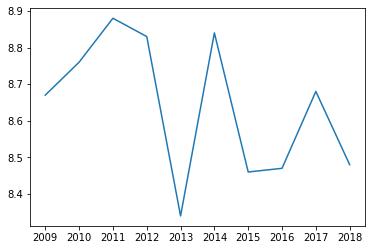

In [26]:
name_plot('Lionel Messi')

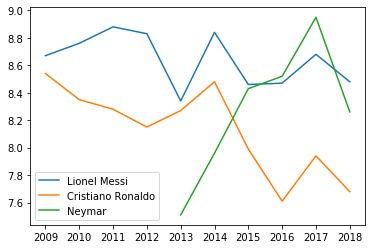

In [27]:
# plt.figure(figsize = (18, 8))

names = ['Lionel Messi', 'Cristiano Ronaldo', 'Neymar']

for name in names:
    name_plot(name)

plt.legend(names)

In [28]:
nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi", "2010"]

,,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
Name,Season,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,2010,Barcelona,24,"AM(CR),FW",31,2859,31,18,4.5,2,5.6,...,67.7,86.2,0.2,1.4,1,31,3,0,0.1,20


In [29]:
nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi"]

,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
Season,,,,,,,,,,,,,,,,,,,,,
2009,Barcelona,23,"AM(CR),FW",30,2841,34,10,4.7,1.9,4.1,...,44.3,85.7,0.6,1.3,0.7,34,3,0,0.2,14
2010,Barcelona,24,"AM(CR),FW",31,2859,31,18,4.5,2,5.6,...,67.7,86.2,0.2,1.4,1,31,3,0,0.1,20
2011,Barcelona,25,"AM(CR),FW",36,3268,50,16,5.5,2.5,4.8,...,63.8,84.2,0.4,1.4,1.5,50,6,0,0.1,24
2012,Barcelona,26,"AM(CR),FW",28,2644,46,12,5.1,1.4,3.8,...,55,85.2,0.2,2.1,0.4,46,1,0,0.2,19
2013,Barcelona,27,"AM(CR),FW",29,2508,27,11,5,2.4,4.6,...,44.4,84.9,0.3,1.1,0.4,27,2,0,0.2,13
2014,Barcelona,28,"AM(CR),FW",37,3375,43,18,4.9,2.5,4.6,...,61.4,82.9,0.5,2.7,0.9,43,4,0,0.2,25
2015,Barcelona,29,"AM(CR),FW",31,2730,26,16,4.8,2.3,3.5,...,55.7,81.9,0.4,3.5,1,26,3,0,0.2,13
2016,Barcelona,30,"AM(CR),FW",32,2833,37,9,5.3,2.3,3.7,...,48.4,80.2,0.3,2.7,0.6,37,6,0,0.2,16
2017,Barcelona,31,"AM(CR),FW",32,2997,34,12,5.5,2.4,5.1,...,52.3,81.2,0.3,2.1,0.5,34,3,0,0.2,22


In [30]:
# testDf = nameSeasonCombinedFieldPlayerDf.loc["Lionel Messi"]

In [31]:
# if test.shape[0] == 10:
#     print("Yes")
# else:
#     print("No")

In [32]:
nameSeasonCombinedFieldPlayerDf.shape

(27918, 33)

In [33]:
nameSeasonCombinedFieldPlayerDf.index

MultiIndex([('Aaron Cresswell', '2014'),
            ('Aaron Cresswell', '2015'),
            ('Aaron Cresswell', '2016'),
            ('Aaron Cresswell', '2017'),
            ('Aaron Cresswell', '2018'),
            (   'Aaron Hughes', '2009'),
            (   'Aaron Hughes', '2010'),
            (   'Aaron Hughes', '2011'),
            (   'Aaron Hughes', '2012'),
            (   'Aaron Hughes', '2013'),
            ...
            (    'Ömer Toprak', '2015'),
            (    'Ömer Toprak', '2016'),
            (    'Ömer Toprak', '2017'),
            (    'Ömer Toprak', '2018'),
            ( 'Özkan Yildirim', '2012'),
            ( 'Özkan Yildirim', '2013'),
            ( 'Özkan Yildirim', '2014'),
            ( 'Özkan Yildirim', '2015'),
            (   'Ümit Korkmaz', '2009'),
            (   'Ümit Korkmaz', '2010')],
           names=['Name', 'Season'], length=27918)

In [34]:
nameSeasonCombinedFieldPlayerDf.index[0][0]

'Aaron Cresswell'

In [35]:
namesSet = set()
for name in nameSeasonCombinedFieldPlayerDf.index:
    namesSet.add(name[0])

In [36]:
len(namesSet)

8575

In [37]:
decadeOfPLayerDf = nameSeasonCombinedFieldPlayerDf
decadeOfPLayerDf = decadeOfPLayerDf.rename_axis(None, axis=1).reset_index()

#removing some columsns for now
decadeOfPLayerDf = decadeOfPLayerDf.drop(['Team', 'Position', 'League'], axis=1)
#convert season column to DateTime
# decadeOfPLayerDf['Season'] = pd.to_datetime(decadeOfPLayerDf.Season , format = '%Y')

decadeOfPLayerDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Cresswell,2014,25,38,3420,2,4,0.5,0.9,0.4,...,35.4,72.2,0.7,3.6,0,2,5,0,1.4,2
1,Aaron Cresswell,2015,26,37,3315,2,4,0.8,1.1,0.3,...,37.2,77.5,0.8,3.1,0,2,1,0,1.1,0
2,Aaron Cresswell,2016,27,24,2118,0,2,0.4,0.7,0.3,...,29.2,75.5,0.7,2.2,0,0,2,1,1.4,1
3,Aaron Cresswell,2017,28,35,3073,1,7,0.6,0.9,0.1,...,36.1,77.1,1,2.7,0,1,7,0,1.6,0
4,Aaron Cresswell,2018,29,18,1591,0,1,0.6,0.9,0.3,...,40.6,81.4,0.8,1.5,0,0,1,0,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27913,Özkan Yildirim,2013,21,2,259,0,0,0.4,0.2,0.9,...,7.7,67.5,0,0.3,0,0,0,0,0.2,0
27914,Özkan Yildirim,2014,22,1,59,0,0,0,0,1,...,14,64.3,0,0,0,0,0,0,1,0
27915,Özkan Yildirim,2015,23,0,13,0,0,1,0,0,...,8,75,0,0,0,0,0,0,1,0
27916,Ümit Korkmaz,2009,24,10,974,2,3,0.9,0.8,1.7,...,17.4,80.8,0.3,0.3,0.1,2,2,0,0.2,0


In [38]:
#creating a seperate DF of players who have played for a decade in europe

for name in namesSet:
    nameDf = decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]
    if nameDf.shape[0] != 10:
        decadeOfPLayerDf = decadeOfPLayerDf[decadeOfPLayerDf.Name != name]
        
decadeOfPLayerDf = decadeOfPLayerDf.set_index(['Name','Season']).sort_index()

In [53]:
decadeOfPLayerDf

Age  Apps  Minutes Total goals Total Assists  \
Name        Season                                                 
Aaron Hunt  2009     23    26     2313           9             5   
            2010     24    21     1895           3             3   
            2011     25    18     1599           3             3   
            2012     26    26     2346          11             3   
            2013     27    31     2675           7             6   
...                 ...   ...      ...         ...           ...   
Ömer Toprak 2014     25    27     2497           1             0   
            2015     26    17     1412           1             0   
            2016     27    25     2104           1             0   
            2017     28    22     2018           0             1   
            2018     29     1      233           0             0   

                   Shots per game Key passes per game Dribbles per game  \
Name        Season                                                        
Aaron Hunt  2009              1.8                 1.5               1.1   
            2010              0.9                 1.6               0.8   
            2011              2.3                 2.7               2.6   
            2012              2.9                 2.1               1.8   
            2013              1.9                 2.2               2.2   
...                           ...                 ...               ...   
Ömer Toprak 2014              0.3                 0.3               0.2   
            2015              0.6                 0.3               0.3   
            2016              0.4                 0.1               0.1   
            2017              0.5                 0.2               0.1   
            2018              0.1                   0               0.1   

                   Fouled per game Offsides per game  ... Passes per game  \
Name        Season                                    ...                   
Aaron Hunt  2009               1.8               0.2  ...            31.9   
            2010               1.3               0.4  ...            28.1   
            2011               2.4               0.4  ...            44.2   
            2012               2.6               0.2  ...            41.6   
            2013               1.7               0.7  ...            34.5   
...                            ...               ...  ...             ...   
Ömer Toprak 2014               0.9               0.1  ...            36.1   
            2015               0.6               0.1  ...            38.9   
            2016               0.4                 0  ...            50.1   
            2017                 1                 0  ...            71.2   
            2018               0.1                 0  ...            20.2   

                   Pass success percentage  Crosses per game  \
Name        Season                                             
Aaron Hunt  2009                      78.9                 1   
            2010                      79.3               0.9   
            2011                      78.7               1.2   
            2012                      79.8               1.5   
            2013                      76.5               1.8   
...                                    ...               ...   
Ömer Toprak 2014                      75.6                 0   
            2015                      76.2                 0   
            2016                      84.4                 0   
            2017                      89.9                 0   
            2018                      97.3                 0   

                   Long balls per game Through balls per game Total Goals  \
Name        Season                                                          
Aaron Hunt  2009                   1.5                    0.1           9   
            2010                   1.1                    0.1           3   
            2011

In [54]:
# decadeOfPLayerDf.loc['Neymar'] # Won't work coz neymar hasn't played for a decade in europe 
# nameSeasonCombinedFieldPlayerDf.loc['Neymar'] # works coz this is the normal DF

## Testing LSTM

## Testing Regression with mutiple timeseries to forecast

In [57]:
testColumns = columns
testColumns.remove('Team')
testColumns.remove('League')
testColumns.remove('Position')

oldNameSeasonDf = combinedFieldPlayersDf.pivot_table(index=['Name'], columns=['Season'],
                     values=testColumns, aggfunc='first').reset_index()

In [58]:
oldNameSeasonDf

Name Aerials won per game                                \
Season                                   2009 2010 2011 2012 2013 2014 2015   
0        Aaron Cresswell                  NaN  NaN  NaN  NaN  NaN  1.4  1.1   
1           Aaron Hughes                  2.4  2.8  1.8  2.9  3.2  NaN  NaN   
2             Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
3           Aaron Lennon                    -  0.1  0.2  0.2  0.1  0.2    -   
4       Aaron Leya Iseka                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                  ...                  ...  ...  ...  ...  ...  ...  ...   
8570       Óscar Serrano                  0.2    -  0.1  NaN  NaN  NaN  NaN   
8571         Óscar Trejo                  NaN  NaN  0.5  NaN  0.7  0.4  0.5   
8572         Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   
8573      Özkan Yildirim                  NaN  NaN  NaN  0.5  0.2    1    1   
8574        Ümit Korkmaz                  0.2    -  NaN  NaN  NaN  NaN  NaN   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       1.4  1.6  ...          NaN  NaN  NaN  NaN  NaN    5    1    2    7   
1       NaN  NaN  ...            2    -    -    1    2  NaN  NaN  NaN  NaN   
2       0.6  0.7  ...            3    2    -    3    2    1    2    3    1   
3         -  0.5  ...            1    1    1    1    1    2    1    -    2   
4       0.8  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN    -  NaN   
...     ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
8570    NaN  NaN  ...            7    1    1  NaN  NaN  NaN  NaN  NaN  NaN   
8571    0.7  NaN  ...          NaN  NaN    5  NaN    4    4    6    4  NaN   
8572    2.9  3.2  ...            3    2    5    8    5   10    2    6    1   
8573    NaN  NaN  ...          NaN  NaN  NaN    -    -    -    -  NaN  NaN   
8574    NaN  NaN  ...            2    -  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             
Season 2018  
0         1  
1       NaN  
2       NaN  
3         1  
4         2  
...     ...  
8570    NaN  
8571      5  
8572      -  
8573    NaN  
8574    NaN  

[8575 rows x 301 columns]

In [59]:
decadeOfOldNameSeasonDf = decadeOfPLayerDf
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.rename_axis(None, axis=1).reset_index()
decadeOfOldNameSeasonDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Hunt,2009,23,26,2313,9,5,1.8,1.5,1.1,...,31.9,78.9,1,1.5,0.1,9,3,0,0.2,3
1,Aaron Hunt,2010,24,21,1895,3,3,0.9,1.6,0.8,...,28.1,79.3,0.9,1.1,0.1,3,2,0,0.2,0
2,Aaron Hunt,2011,25,18,1599,3,3,2.3,2.7,2.6,...,44.2,78.7,1.2,2.5,0.2,3,0,1,0.6,1
3,Aaron Hunt,2012,26,26,2346,11,3,2.9,2.1,1.8,...,41.6,79.8,1.5,2.9,0.3,11,3,0,0.6,2
4,Aaron Hunt,2013,27,31,2675,7,6,1.9,2.2,2.2,...,34.5,76.5,1.8,2.6,0.1,7,2,0,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Ömer Toprak,2014,25,27,2497,1,0,0.3,0.3,0.2,...,36.1,75.6,0,3.2,0,1,10,0,3.8,1
2296,Ömer Toprak,2015,26,17,1412,1,0,0.6,0.3,0.3,...,38.9,76.2,0,3.7,0.1,1,2,0,2.9,2
2297,Ömer Toprak,2016,27,25,2104,1,0,0.4,0.1,0.1,...,50.1,84.4,0,3.2,0,1,6,0,2.9,0
2298,Ömer Toprak,2017,28,22,2018,0,1,0.5,0.2,0.1,...,71.2,89.9,0,3.7,0,0,1,0,3.2,0


In [60]:
decadeOfOldNameSeasonDf

,Name,Season,Age,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Aaron Hunt,2009,23,26,2313,9,5,1.8,1.5,1.1,...,31.9,78.9,1,1.5,0.1,9,3,0,0.2,3
1,Aaron Hunt,2010,24,21,1895,3,3,0.9,1.6,0.8,...,28.1,79.3,0.9,1.1,0.1,3,2,0,0.2,0
2,Aaron Hunt,2011,25,18,1599,3,3,2.3,2.7,2.6,...,44.2,78.7,1.2,2.5,0.2,3,0,1,0.6,1
3,Aaron Hunt,2012,26,26,2346,11,3,2.9,2.1,1.8,...,41.6,79.8,1.5,2.9,0.3,11,3,0,0.6,2
4,Aaron Hunt,2013,27,31,2675,7,6,1.9,2.2,2.2,...,34.5,76.5,1.8,2.6,0.1,7,2,0,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Ömer Toprak,2014,25,27,2497,1,0,0.3,0.3,0.2,...,36.1,75.6,0,3.2,0,1,10,0,3.8,1
2296,Ömer Toprak,2015,26,17,1412,1,0,0.6,0.3,0.3,...,38.9,76.2,0,3.7,0.1,1,2,0,2.9,2
2297,Ömer Toprak,2016,27,25,2104,1,0,0.4,0.1,0.1,...,50.1,84.4,0,3.2,0,1,6,0,2.9,0
2298,Ömer Toprak,2017,28,22,2018,0,1,0.5,0.2,0.1,...,71.2,89.9,0,3.7,0,0,1,0,3.2,0


In [61]:
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.pivot_table(index=['Name'], columns=['Season'],
                     values=testColumns, aggfunc='first').reset_index()

In [62]:
decadeOfOldNameSeasonDf

Name Aerials won per game                                \
Season                                    2009 2010 2011 2012 2013 2014 2015   
0              Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
1            Aaron Ramsey                  0.7    0  0.3  0.4  0.5  0.6  0.9   
2          Afriyie Acquah                  NaN  0.5  0.4  0.6  0.6  0.8  0.7   
3       Alberto Gilardino                  1.5  0.9  2.1  2.3  2.1  1.1  2.2   
4             Albin Ekdal                  0.5  0.3  0.8  1.7  1.2  1.4  3.4   
..                    ...                  ...  ...  ...  ...  ...  ...  ...   
225         Álvaro Morata                  NaN    0    0  1.7  0.9  0.8  0.6   
226         Étienne Didot                  0.4  0.4  0.2  0.6  0.5  1.1  1.6   
227           Éver Banega                  0.3  0.3  0.1  0.2  0.2  0.2  0.2   
228       Óscar De Marcos                  0.6  0.7  0.6    1  0.9  1.3  1.4   
229           Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
1       0.3  0.4  ...            0    1    3    5    3    6    4    3    0   
2       0.8  0.6  ...          NaN    2    5    3    7    3    9    2    3   
3       0.4  NaN  ...            1    3    3    4    8    0    4    2  NaN   
4       1.7  1.6  ...            3    4    3    8    6    7    4    2    3   
..      ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
225     0.9  1.7  ...          NaN    0    0    3    2    6    6    8    7   
226     0.6  0.9  ...            3    2    3    5    7    4    1    6    4   
227     0.2  0.4  ...           12    8    3    7    5   11    6    2    9   
228     1.1    1  ...            1    3    9   14    3    6    6    3    5   
229     2.9  3.2  ...            3    2    5    8    5   10    2    6    1   

             
Season 2018  
0       NaN  
1         0  
2         4  
3       NaN  
4         6  
..      ...  
225       5  
226       4  
227      15  
228       4  
229       0  

[230 rows x 301 columns]

In [63]:
decadeOfOldNameSeasonDf = decadeOfOldNameSeasonDf.fillna(0)
decadeOfOldNameSeasonDf

Name Aerials won per game                                \
Season                                    2009 2010 2011 2012 2013 2014 2015   
0              Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
1            Aaron Ramsey                  0.7    0  0.3  0.4  0.5  0.6  0.9   
2          Afriyie Acquah                    0  0.5  0.4  0.6  0.6  0.8  0.7   
3       Alberto Gilardino                  1.5  0.9  2.1  2.3  2.1  1.1  2.2   
4             Albin Ekdal                  0.5  0.3  0.8  1.7  1.2  1.4  3.4   
..                    ...                  ...  ...  ...  ...  ...  ...  ...   
225         Álvaro Morata                    0    0    0  1.7  0.9  0.8  0.6   
226         Étienne Didot                  0.4  0.4  0.2  0.6  0.5  1.1  1.6   
227           Éver Banega                  0.3  0.3  0.1  0.2  0.2  0.2  0.2   
228       Óscar De Marcos                  0.6  0.7  0.6    1  0.9  1.3  1.4   
229           Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
1       0.3  0.4  ...            0    1    3    5    3    6    4    3    0   
2       0.8  0.6  ...            0    2    5    3    7    3    9    2    3   
3       0.4    0  ...            1    3    3    4    8    0    4    2    0   
4       1.7  1.6  ...            3    4    3    8    6    7    4    2    3   
..      ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
225     0.9  1.7  ...            0    0    0    3    2    6    6    8    7   
226     0.6  0.9  ...            3    2    3    5    7    4    1    6    4   
227     0.2  0.4  ...           12    8    3    7    5   11    6    2    9   
228     1.1    1  ...            1    3    9   14    3    6    6    3    5   
229     2.9  3.2  ...            3    2    5    8    5   10    2    6    1   

             
Season 2018  
0         0  
1         0  
2         4  
3         0  
4         6  
..      ...  
225       5  
226       4  
227      15  
228       4  
229       0  

[230 rows x 301 columns]

In [64]:
allPlayerRatingDf = decadeOfPLayerDf.pivot_table(index=['Name'], columns=['Season'],
                     values=['Rating'], aggfunc='first').reset_index()

In [65]:
allPlayerRatingDf = allPlayerRatingDf.fillna(0)

In [66]:
#Get only currently active players
# allPlayerRatingDf = allPlayerRatingDf[allPlayerRatingDf.Rating['2018'].notnull()]

In [67]:
allPlayerRatingDf

Name Rating                                            \
Season                      2009  2010  2011  2012  2013  2014  2015  2016   
0              Aaron Hunt   7.15  6.65  7.44  7.32  7.31  6.44  6.88  6.65   
1            Aaron Ramsey   6.86  6.46  6.77  6.96  7.76  7.07  7.21  6.72   
2          Afriyie Acquah   0.00  6.43  6.40  6.50  6.71  6.86  6.70  6.41   
3       Alberto Gilardino   6.99  6.79  7.05  6.83  6.68  6.72  6.52  6.00   
4             Albin Ekdal   6.80  6.60  7.03  6.97  6.71  7.16  6.97  6.54   
..                    ...    ...   ...   ...   ...   ...   ...   ...   ...   
225         Álvaro Morata   0.00  6.08  6.16  6.68  6.66  6.74  6.76  7.17   
226         Étienne Didot   6.90  6.93  7.23  6.98  6.92  6.68  6.83  6.78   
227           Éver Banega   7.20  7.09  7.42  7.14  6.95  7.00  7.21  7.16   
228       Óscar De Marcos   6.52  6.50  6.91  6.80  6.64  6.85  7.02  6.76   
229           Ömer Toprak   6.28  6.49  6.79  6.95  7.08  7.41  7.09  6.72   

                    
Season  2017  2018  
0       6.79  0.00  
1       7.27  6.70  
2       6.22  6.42  
3       0.00  0.00  
4       6.61  6.99  
..       ...   ...  
225     6.94  7.10  
226     6.66  6.42  
227     7.08  7.08  
228     6.74  6.57  
229     6.93  6.14  

[230 rows x 11 columns]

In [68]:
decadeOfOldNameSeasonDf.Name.tolist()

['Aaron Hunt',
 'Aaron Ramsey',
 'Afriyie Acquah',
 'Alberto Gilardino',
 'Albin Ekdal',
 'Aleksandar Kolarov',
 'Alexander Esswein',
 'Alexandre Lacazette',
 'Alexis Ruano',
 'Ander Herrera',
 'Ander Iturraspe',
 'Andrea Poli',
 'Andrés Guardado',
 'Antonio Valencia',
 'Aritz Aduriz',
 'Arjen Robben',
 'Arturo Vidal',
 'Ashley Young',
 'Benjamin Stambouli',
 'Borja Valero',
 'Bostjan Cesar',
 'Carlos Vela',
 "Cheikh M'Bengue",
 'Chris Smalling',
 'Christian Fuchs',
 'Christophe Jallet',
 'Claudio Pizarro',
 'Cristiano Ronaldo',
 'Cristián Zapata',
 'Dani Alves',
 'Daniel Congré',
 'Daniel Parejo',
 'Daniel Schwaab',
 'Daniele Bonera',
 'Daniele De Rossi',
 'Danny Rose',
 'Darren Fletcher',
 'David Luiz',
 'David Silva',
 'Dejan Lovren',
 'Diego',
 'Diego Costa',
 'Diego Godín',
 'Djamel Mesbah',
 'Eden Hazard',
 'Edinson Cavani',
 'Eljero Elia',
 'Emanuele Giaccherini',
 'Emiliano Moretti',
 'Eric Maxim Choupo-Moting',
 'Esteban Granero',
 'Etienne Capoue',
 'Eugen Polanski',
 'Ezequi

In [69]:
decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == 'Aaron Hunt']['Rating']['2018'].tolist()[0]

0.0

In [70]:
#creating a non pivot table with all active player ratings

currentColumns=['Name', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
currentList = []
for name in decadeOfOldNameSeasonDf.Name.tolist():
    currentName = name
#     print(currentName)
    rating09 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2009'].tolist()[0]
    rating10 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2010'].tolist()[0]
    rating11 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2011'].tolist()[0]
    rating12 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2012'].tolist()[0]
    rating13 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2013'].tolist()[0]
    rating14 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2014'].tolist()[0]
    rating15 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2015'].tolist()[0]
    rating16 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2016'].tolist()[0]
    rating17 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2017'].tolist()[0]
    rating18 = decadeOfOldNameSeasonDf.loc[decadeOfOldNameSeasonDf['Name'] == name]['Rating']['2018'].tolist()[0]
    currentList.append([currentName, rating09, rating10, rating11, rating12, rating13, rating14, rating15, rating16, rating17, rating18])

activePlayerRatingDf = pd.DataFrame(currentList, columns=currentColumns)
activePlayerRatingDf

,Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aaron Hunt,7.15,6.65,7.44,7.32,7.31,6.44,6.88,6.65,6.79,0.00
1,Aaron Ramsey,6.86,6.46,6.77,6.96,7.76,7.07,7.21,6.72,7.27,6.70
2,Afriyie Acquah,0.00,6.43,6.40,6.50,6.71,6.86,6.70,6.41,6.22,6.42
3,Alberto Gilardino,6.99,6.79,7.05,6.83,6.68,6.72,6.52,6.00,0.00,0.00
4,Albin Ekdal,6.80,6.60,7.03,6.97,6.71,7.16,6.97,6.54,6.61,6.99
...,...,...,...,...,...,...,...,...,...,...,...
225,Álvaro Morata,0.00,6.08,6.16,6.68,6.66,6.74,6.76,7.17,6.94,7.10
226,Étienne Didot,6.90,6.93,7.23,6.98,6.92,6.68,6.83,6.78,6.66,6.42
227,Éver Banega,7.20,7.09,7.42,7.14,6.95,7.00,7.21,7.16,7.08,7.08
228,Óscar De Marcos,6.52,6.50,6.91,6.80,6.64,6.85,7.02,6.76,6.74,6.57


In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [72]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [73]:
activePlayerRatingDf.loc[activePlayerRatingDf['Name'] == 'Aaron Hunt'].set_index('Name')

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,
Aaron Hunt,7.15,6.65,7.44,7.32,7.31,6.44,6.88,6.65,6.79,0.0


In [74]:
# First, we get the data
stockList = decadeOfOldNameSeasonDf.Name.tolist()
stockList

['Aaron Hunt',
 'Aaron Ramsey',
 'Afriyie Acquah',
 'Alberto Gilardino',
 'Albin Ekdal',
 'Aleksandar Kolarov',
 'Alexander Esswein',
 'Alexandre Lacazette',
 'Alexis Ruano',
 'Ander Herrera',
 'Ander Iturraspe',
 'Andrea Poli',
 'Andrés Guardado',
 'Antonio Valencia',
 'Aritz Aduriz',
 'Arjen Robben',
 'Arturo Vidal',
 'Ashley Young',
 'Benjamin Stambouli',
 'Borja Valero',
 'Bostjan Cesar',
 'Carlos Vela',
 "Cheikh M'Bengue",
 'Chris Smalling',
 'Christian Fuchs',
 'Christophe Jallet',
 'Claudio Pizarro',
 'Cristiano Ronaldo',
 'Cristián Zapata',
 'Dani Alves',
 'Daniel Congré',
 'Daniel Parejo',
 'Daniel Schwaab',
 'Daniele Bonera',
 'Daniele De Rossi',
 'Danny Rose',
 'Darren Fletcher',
 'David Luiz',
 'David Silva',
 'Dejan Lovren',
 'Diego',
 'Diego Costa',
 'Diego Godín',
 'Djamel Mesbah',
 'Eden Hazard',
 'Edinson Cavani',
 'Eljero Elia',
 'Emanuele Giaccherini',
 'Emiliano Moretti',
 'Eric Maxim Choupo-Moting',
 'Esteban Granero',
 'Etienne Capoue',
 'Eugen Polanski',
 'Ezequi

In [75]:
allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == stockList[0]]['Rating'][str(2009)].tolist()[0]

7.15

In [76]:
#creating a non pivot table with all active player ratings

df_ = {}

for name in stockList:
    testColumn=['Name', 'Season', 'Rating']
    testList = []
    currentName = name
#     print(currentName)
    for i in range(2009, 2019):
#         print(allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == 'Aaron Hunt']['Rating'][str(i)].tolist())
        testList.append([
            name, 
            i, 
            allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == name]['Rating'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Team'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['League'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Position'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Apps'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Minutes'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total Assists'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Shots per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Key passes per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dribbles per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Fouled per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Offsides per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dispossessed per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Bad control per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Tackles per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Interceptions per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Fouls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Clearances per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dribbled past per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Outfield blocks per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Own goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Passes per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Pass success percentage'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Crosses per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Long balls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Through balls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total Goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Yellow cards'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Red cards'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Aerials won per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Man of the match'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Rating'][str(i)].tolist()[0]])
    
    testDf = pd.DataFrame(testList, columns=testColumn)
    df_[name] = testDf.set_index('Season')
    df_[name].index = pd.to_datetime(df_[name].index, format = '%Y')
# allPlayerRatingDf.loc[allPlayerRatingDf['Name'] == 'Aaron Cresswell']['Rating']['2009'].tolist()[0]

In [81]:
columns

['Age',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'Rating',
 'Tackles per game',
 'Interceptions per game',
 'Fouls per game',
 'Clearances per game',
 'Dribbled past per game',
 'Outfield blocks per game',
 'Own goals',
 'Passes per game',
 'Pass success percentage',
 'Crosses per game',
 'Long balls per game',
 'Through balls per game',
 'Total Goals',
 'Yellow cards',
 'Red cards',
 'Aerials won per game',
 'Man of the match']

In [77]:
# test = pd.to_datetime(df_['Lionel Messi'].index, format = '%Y')

In [78]:
df_['Lionel Messi']

,Name,Rating
Season,,
2009-01-01,Lionel Messi,8.67
2010-01-01,Lionel Messi,8.76
2011-01-01,Lionel Messi,8.88
2012-01-01,Lionel Messi,8.83
2013-01-01,Lionel Messi,8.34
2014-01-01,Lionel Messi,8.84
2015-01-01,Lionel Messi,8.46
2016-01-01,Lionel Messi,8.47
2017-01-01,Lionel Messi,8.68


In [59]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2015", "Rating")

In [60]:
df_new['Lionel Messi']

{'Train': Season
 2009-01-01    8.67
 2010-01-01    8.76
 2011-01-01    8.88
 2012-01-01    8.83
 2013-01-01    8.34
 2014-01-01    8.84
 2015-01-01    8.46
 Name: Rating, dtype: float64, 'Test': Season
 2015-01-01    8.46
 2016-01-01    8.47
 2017-01-01    8.68
 2018-01-01    8.48
 Name: Rating, dtype: float64}

C:\Users\Suwadith\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


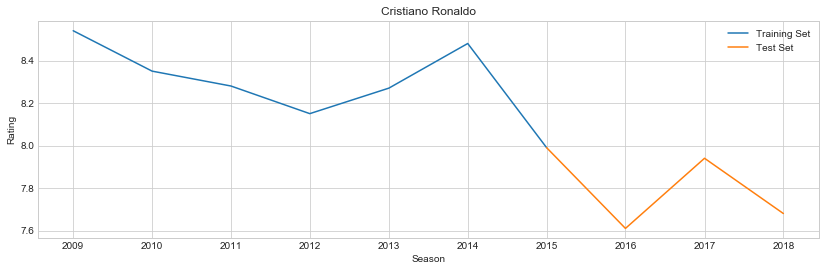

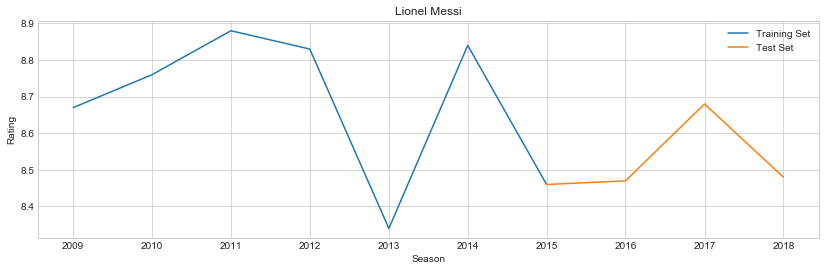

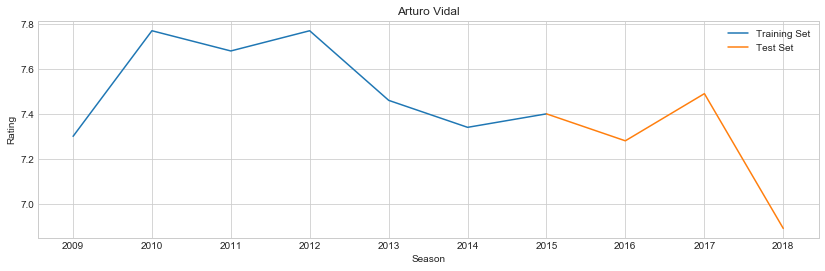

In [61]:
playerList = ['Cristiano Ronaldo', 'Lionel Messi', 'Arturo Vidal']

for i in playerList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Rating")
    plt.xlabel("Season")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i)

In [62]:
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [63]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

Aaron Hunt (7, 1)
Aaron Ramsey (7, 1)
Afriyie Acquah (7, 1)
Alberto Gilardino (7, 1)
Albin Ekdal (7, 1)
Aleksandar Kolarov (7, 1)
Alexander Esswein (7, 1)
Alexandre Lacazette (7, 1)
Alexis Ruano (7, 1)
Ander Herrera (7, 1)
Ander Iturraspe (7, 1)
Andrea Poli (7, 1)
Andrés Guardado (7, 1)
Antonio Valencia (7, 1)
Aritz Aduriz (7, 1)
Arjen Robben (7, 1)
Arturo Vidal (7, 1)
Ashley Young (7, 1)
Benjamin Stambouli (7, 1)
Borja Valero (7, 1)
Bostjan Cesar (7, 1)
Carlos Vela (7, 1)
Cheikh M'Bengue (7, 1)
Chris Smalling (7, 1)
Christian Fuchs (7, 1)
Christophe Jallet (7, 1)
Claudio Pizarro (7, 1)
Cristiano Ronaldo (7, 1)
Cristián Zapata (7, 1)
Dani Alves (7, 1)
Daniel Congré (7, 1)
Daniel Parejo (7, 1)
Daniel Schwaab (7, 1)
Daniele Bonera (7, 1)
Daniele De Rossi (7, 1)
Danny Rose (7, 1)
Darren Fletcher (7, 1)
David Luiz (7, 1)
David Silva (7, 1)
Dejan Lovren (7, 1)
Diego (7, 1)
Diego Costa (7, 1)
Diego Godín (7, 1)
Djamel Mesbah (7, 1)
Eden Hazard (7, 1)
Edinson Cavani (7, 1)
Eljero Elia (7, 1)


In [64]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(2,7):
        X_train.append(transform_train[j][i-2:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(2, 4):
        X_test.append(transform_test[j][i-2:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [65]:
trainset

{'Aaron Hunt': {'X': array([[[0.71],
          [0.21]],
  
         [[0.21],
          [1.  ]],
  
         [[1.  ],
          [0.88]],
  
         [[0.88],
          [0.87]],
  
         [[0.87],
          [0.  ]]]), 'y': array([1.  , 0.88, 0.87, 0.  , 0.44])},
 'Aaron Ramsey': {'X': array([[[0.30769231],
          [0.        ]],
  
         [[0.        ],
          [0.23846154]],
  
         [[0.23846154],
          [0.38461538]],
  
         [[0.38461538],
          [1.        ]],
  
         [[1.        ],
          [0.46923077]]]),
  'y': array([0.23846154, 0.38461538, 1.        , 0.46923077, 0.57692308])},
 'Afriyie Acquah': {'X': array([[[0.        ],
          [0.93731778]],
  
         [[0.93731778],
          [0.93294461]],
  
         [[0.93294461],
          [0.94752187]],
  
         [[0.94752187],
          [0.97813411]],
  
         [[0.97813411],
          [1.        ]]]),
  'y': array([0.93294461, 0.94752187, 0.97813411, 1.        , 0.97667638])},
 'Alberto Gilardino':

In [66]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
Aaron Hunt,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Aaron Ramsey,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Afriyie Acquah,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Alberto Gilardino,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Albin Ekdal,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
...,...,...,...,...
Álvaro Morata,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Étienne Didot,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Éver Banega,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"
Óscar De Marcos,"(5, 2, 1)","(5,)","(2, 2, 1)","(2,)"


In [67]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to Aaron Hunt
Epoch 1/10
5/5 [==============================] - 2s 432ms/step - loss: 0.5446
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5211
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5080
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4900
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4765
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4755
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4406
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.4418
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 10/10
5/5 [==============================] - 0s 996us/step - loss: 0.3832
Fitting to Aaron Ramsey
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2052
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.2091
Epoch 3/10
5/5 [=====

Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1120
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0579
Epoch 5/10
5/5 [==============================] - 0s 992us/step - loss: 0.0576
Epoch 6/10
5/5 [==============================] - 0s 993us/step - loss: 0.0709
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0272
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0528
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0314
Epoch 10/10
5/5 [==============================] - 0s 798us/step - loss: 0.0591
Fitting to Andrea Poli
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1174
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 3/10
5/5 [==============================] - 0s 802us/step - loss: 0.1035
Epoch 4/10
5/5 [==============================] - 0s 992us/step - loss: 0.0757
Epoch 5/10
5/5 [====================

Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1912
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1341
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1424
Epoch 8/10
5/5 [==============================] - 0s 996us/step - loss: 0.1765
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1061
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1998
Fitting to Carlos Vela
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1504
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0592
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0793
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0811
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0880
Epoch 7/10
5/5 [==================

Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0910
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1007
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0533
Fitting to Daniel Parejo
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0578
Epoch 3/10
5/5 [==============================] - 0s 798us/step - loss: 0.0862
Epoch 4/10
5/5 [==============================] - 0s 992us/step - loss: 0.0598
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0708
Epoch 6/10
5/5 [==============================] - 0s 993us/step - loss: 0.0760
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 9/10
5/5 [====================

Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1846
Fitting to Diego Costa
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1143
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0909
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0958
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 5/10
5/5 [==============================] - 0s 798us/step - loss: 0.0592
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0730
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0571
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 10/10
5/5 [==============================] - 0s 798us/step - loss: 0.0867
Fitting to Diego Godín
Epoch 1/10
5/5 [

Fitting to Etienne Capoue
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1694
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1506
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1895
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1462
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1675
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1663
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1844
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1620
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1804
Fitting to Eugen Polanski
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.2230
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1959
Epoch 3/10


Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1139
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1311
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0935
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1087
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0798
Epoch 7/10
5/5 [==============================] - 0s 999us/step - loss: 0.0865
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0864
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0914
Fitting to Francis Coquelin
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2547
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1627
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1006
Epoch 4/10
5/5 [===================

Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1704
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1200
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1120
Fitting to Giorgio Chiellini
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1653
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1461
Epoch 4/10
5/5 [==============================] - 0s 996us/step - loss: 0.1467
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1858
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 7/10
5/5 [========================

Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0911
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0654
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1002
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1089
Fitting to Iker Muniain
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1571
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1108
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1462
Epoch 4/10
5/5 [==============================] - 0s 798us/step - loss: 0.1348
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1222
Epoch 6/10
5/5 [==============================] - 0s 996us/step - loss: 0.1456
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1422
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1203
Epoch 9/10
5/5 [=================

Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0129
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0084
Fitting to Javier Mascherano
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2647
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 4/10
5/5 [==============================] - 0s 998us/step - loss: 0.1264
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1508
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1213
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1521
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1408
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1268
Fitting to Javier Pastore
Epoch

Fitting to Jonathan de Guzmán
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0121
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0197
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0265
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0105
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0263
Fitting to Jonny Evans
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2184
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1389
Epoch 3/10

Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0505
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0913
Epoch 8/10
5/5 [==============================] - 0s 996us/step - loss: 0.0671
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0704
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0439
Fitting to Kevin Gameiro
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2040
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0884
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0882
Epoch 5/10
5/5 [==========================

Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1731
Epoch 6/10
5/5 [==============================] - 0s 798us/step - loss: 0.1785
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2156
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.2049
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.2063
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1579
Fitting to Loic Perrin
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1845
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1691
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0875
Epoch 4/10
5/5 [==============================] - 0s 995us/step - loss: 0.1637
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1204
Epoch 6/10
5/5 [==============================] - 0s 995us/step - loss: 0.0900
Epoch 7/10
5/5 [==================

Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0991
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1243
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1200
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1338
Fitting to Marc Albrighton
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.0815
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1355
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0962
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0983
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1235
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.1243
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0987
Epoch 9/10
5/5 [====================

Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0695
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0507
Fitting to Martin Kelly
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1202
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0974
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0901
Epoch 4/10
5/5 [==============================] - 0s 997us/step - loss: 0.0796
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0786
Epoch 6/10
5/5 [==============================] - 0s 994us/step - loss: 0.0543
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0671
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0542
Fitting to Martín Demichelis
Epoch

Fitting to Maxime Gonalons
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.0296
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.0529
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0320
Epoch 4/10
5/5 [==============================] - 0s 994us/step - loss: 0.0626
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0691
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0225
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0043
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0254
Fitting to Michael Ciani
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.0669
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1581
Epo

Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0223
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0056
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0255
Fitting to Pablo Hernández
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4638
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3664
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2302
Epoch 5/10
5/5 [==========================

Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0131
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0422
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.0227
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 10/10
5/5 [==============================] - 0s 998us/step - loss: 0.0117
Fitting to Per Mertesacker
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2189
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1051
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0840
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0863
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1061
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.0471
Epoch 8/10
5/5 [==================

Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1505
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1401
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1467
Fitting to Rodrigo Palacio
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1371
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1438
Epoch 4/10
5/5 [==============================] - 0s 996us/step - loss: 0.1311
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.1123
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0879
Epoch 7/10
5/5 [==============================] - 0s 984us/step - loss: 0.1085
Epoch 8/10
5/5 [==============================] - 0s 998us/step - loss: 0.1327
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 10/10
5/5 [===================

Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1102
Fitting to Sergio Busquets
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1387
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1199
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0916
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0997
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0812
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0751
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0850
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.0803
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0873
Fitting to Sergio Pellissier
Epoch 1/10
5/5 [==============================] - 0s 997us/step - loss: 0.1183
Epoc

Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0658
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0439
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.0138
Fitting to Steven Nzonzi
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4941
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.3461
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3075
Epoch 4/10
5/5 [==========================

Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2145
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2356
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1889
Epoch 7/10
5/5 [==============================] - 0s 997us/step - loss: 0.2003
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.2146
Epoch 9/10
5/5 [==============================] - 0s 997us/step - loss: 0.1715
Epoch 10/10
5/5 [==============================] - 0s 997us/step - loss: 0.1423
Fitting to Toni Kroos
Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0634
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.0708
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 5/10
5/5 [==============================] - 0s 997us/step - loss: 0.0341
Epoch 6/10
5/5 [=======================

Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.1562
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1251
Epoch 8/10
5/5 [==============================] - 0s 997us/step - loss: 0.1421
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1518
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1408
Fitting to Álvaro Morata
Epoch 1/10
5/5 [==============================] - 0s 998us/step - loss: 0.1542
Epoch 2/10
5/5 [==============================] - 0s 997us/step - loss: 0.1651
Epoch 3/10
5/5 [==============================] - 0s 997us/step - loss: 0.1293
Epoch 4/10
5/5 [==============================] - 0s 998us/step - loss: 0.1137
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 6/10
5/5 [==============================] - 0s 997us/step - loss: 0.0377
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 8/10
5/5 [====================

[[7.94]
 [7.68]]
[[7.888751 ]
 [7.8842163]]
[[8.68]
 [8.48]]
[[8.616365]
 [8.619413]]
[[7.49]
 [6.89]]
[[7.334026]
 [7.33422 ]]


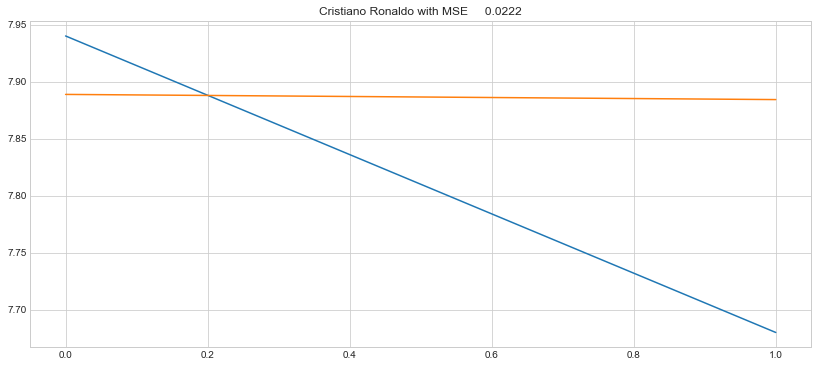

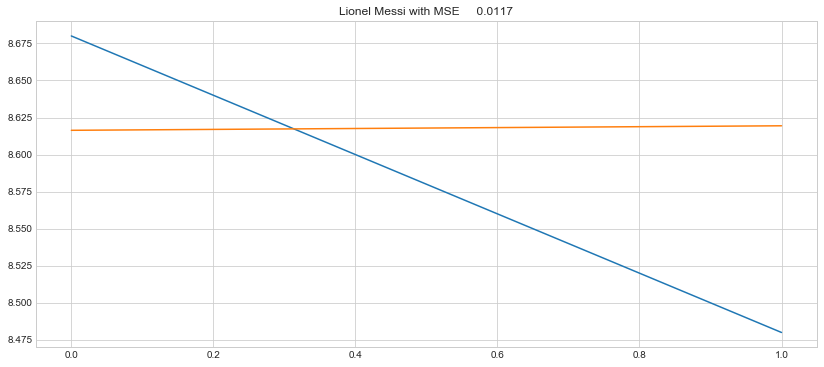

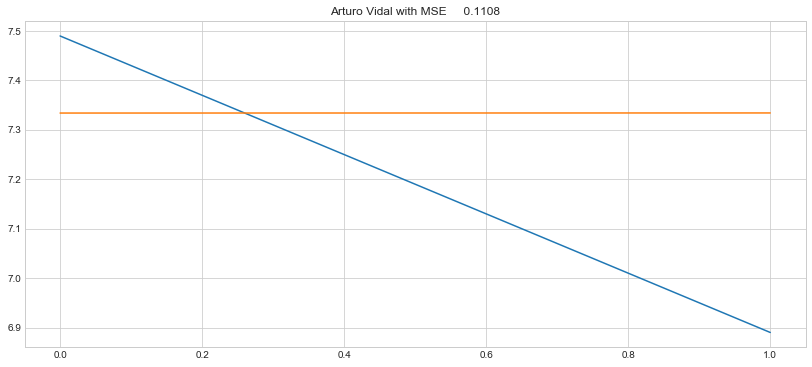

In [68]:
pred_result = {}
for i in playerList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)
    print(y_true)
    print(y_pred)

In [73]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics=['accuracy'])
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressorGRU.fit(trainset[i]["X"], trainset[i]["y"],epochs=50,batch_size=150)

Fitting to Aaron Hunt
Epoch 1/50
5/5 [==============================] - 2s 467ms/step - loss: 0.5598 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 991us/step - loss: 0.1962 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.4000
Epoch 8/50
5/5 [==============================] - 0s 1000us/step - loss: 0.1275 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.2000
Epoch 11/5

Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.0800 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 997us/step - loss: 0.0734 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2000
Epoch 45/50
5/5 [=

Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 997us/step - loss: 0.1028 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.0000e+00
Epoch 28/50
5/5 [==============================] - 0s 997us/step - loss: 0.1253 - accuracy: 0.2000
Epoch 29/50
5/5 [=====

Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.2000
Epoch 13/50
5/5 [====================

Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 7.6087e-04 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 4.4427e-04 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2000
Epoch 48/50
5/5 [=====

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1301 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.2000
Epoch 32/50
5/5 [=============

Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 997us/step - loss: 0.0400 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.2000
Epoch 16/50
5/5 [===============

Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.4000
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.2000
Fitting to Andrés Guardado
Epo

Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 991us/step - loss: 0.1395 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.2000
Epoch 35/50
5/5 [===========

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.2000
Epoch 19/50
5/5 [==============

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 9.3943e-04 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 992us/step - loss: 0.0013 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 8.4393e-04 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.2000
Epoch 36/50
5/5 [===

Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.0000e+00
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.0000e+00
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.0000e+00
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.0000e+00
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.0000e+00
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.0000e+00
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.0000e+00
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.0

Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.0529 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.0574 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 997us/step - loss: 0.0516 - accuracy: 0.2000
Fitting to Cheikh M'Beng

Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.0532 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.2000
Epoch 33/50
5/5 [===========

Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.1324 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.1354 - accuracy: 0.2000
Epoch 17/50
5/5 [============

Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.4000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.2000
Fitting to Cristiano Ronaldo
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.0000e+0

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.4000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.4000
Epoch 28/50
5/5 [==============================] - 0s 997us/step - loss: 0.1736 - accuracy: 0.4000
Epoch 29/50
5/5 [==============================] - 0s 995us/step - loss: 0.1803 - accuracy: 0.0000e+00
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.6000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.6000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.4000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.4000
Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.1746 - accuracy: 0.6000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.2000
Epoch 36/50
5/5 [===

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 998us/step - loss: 0.0430 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.2000
Epoch 20/50
5/5 [===========

Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 997us/step - loss: 0.0771 - accuracy: 0.2000
Fitting to Daniel Schwaab
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1794 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.2000
Epoch

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.2000
Epoch 38/50
5/5 [=============

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.0000e+00
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.0000e+00
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.0000e+00
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.0000e+00
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.0000e+00
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.0000e+00
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.0000e+00
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.0000e+00
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.0000e+00
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0

Epoch 45/50
5/5 [==============================] - 0s 997us/step - loss: 0.0256 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 997us/step - loss: 0.0270 - accuracy: 0.2000
Fitting to David Luiz
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 997us/step - loss: 0.5432 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0

Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.0842 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 997us/step - loss: 0.0831 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.2000
Epoch 39/50
5/5 [=========

5/5 [==============================] - 0s 997us/step - loss: 0.1461 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.1467 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.2000
Epoch 23/50
5/5 [=====================

Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.2000
Fitting to Diego Godín
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.2000
Epoch 8/50
5/5

Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.0029 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.2000
Epoch 42/50
5/5 [===========

Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 997us/step - loss: 0.1247 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.2000
Epoch 26/50
5/5 [===========

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.2000
Fitting to Emanuele Giaccherini
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.2000
Epo

Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.0237 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 997us/step - loss: 0.0251 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 997us/step - loss: 0.0249 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.2000
Epoch 44/50
5/5 [=======

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.2000
Epoch 28/50
5/5 [=============

Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.2000
Epoch 12/50
5/5 [=====================

Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 997us/step - loss: 0.1523 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.2000
Epoch 47/50
5/5 [===========

Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.4000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.4000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.4000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.4000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.4000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.4000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.4000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.4000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.4000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.4000
Epoch 31/50
5/5 [=============

Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 8.1506e-04 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 6.6387e-04 - accuracy: 0.2000
Epoch 15/50
5/5 [==========

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 997us/step - loss: 0.1298 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.1297 - accuracy: 0.2000
Epoch 49/50
5/5 [=========

Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.1075 - accuracy: 0.2000
Epoch 33/50
5/5 [===========

Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.0847 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 997us/step - loss: 0.0144 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.2000
Epoch 17/50
5/5 [============

Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.1212 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.2000
Fitting to Franck Tabanou
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1809 - accuracy: 0.2000
Epo

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 997us/step - loss: 0.0136 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 998us/step - loss: 0.0104 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.2000
Epoch 36/50
5/5 [=========

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 997us/step - loss: 0.0016 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.2000
Epoch 20/50
5/5 [===========

Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Fitting to Gerard Piqué
Epoch 1/50
5/5 [==============================] - 0s 997us/step - loss: 0.2805 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.2000
Epoch 5/

Epoch 29/50
5/5 [==============================] - 0s 997us/step - loss: 0.0077 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 997us/step - loss: 0.0011 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 9.1187e-04 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 8.3793e-04 - accuracy: 0.2000
Epoch 39/50
5/

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 995us/step - loss: 0.1390 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 996us/step - loss: 0.1389 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.2000
Epoch 22/50
5/5 [=========

Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.0000e+00
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.0000e+00
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.0000e+00
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.0000e+00
Epoch 49/50
5/5 [==============================] - 0s 997us/step - loss: 0.1348 - accuracy: 0.0000e+00
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.0000e+00
Fitting to Gylfi Sigurdsson
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0421

Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.2000
Epoch 39/50
5/5 [=============

Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.0467 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 997us/step - loss: 0.0475 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.2000
Epoch 23/50
5/5 [=========

Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.1549 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.2000
Fitting to Ibai Gómez
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.0140 - accuracy: 0.2000
Epoch 8/50


Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.0321 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.2000
Epoch 42/50
5/5 [===========

Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4000
Epoch 17/50
5/5 [==============================] - 0s 997us/step - loss: 0.1414 - accuracy: 0.4000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.4000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.4000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.4000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.4000
Epoch 26/50
5/5 [===========

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.2000
Fitting to Ivan Perisic
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.2000
Epoch 10/50
5/5

Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 995us/step - loss: 0.2025 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.2000
Epoch 44/50
5/5 [===========

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 997us/step - loss: 0.1492 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.2000
Epoch 28/50
5/5 [===========

Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 997us/step - loss: 0.1500 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.2000
Epoch 44/50
5/5 [===========

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.2000
Epoch 28/50
5/5 [=============

Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.2000
Epoch 12/50
5/5 [=====================

Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 997us/step - loss: 0.0650 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 997us/step - loss: 0.0650 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.2000
Epoch 46/50
5/5 [=========

Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.0000e+00
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.0000e+00
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.0000e+00
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.0000e+00
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.0000e+00
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.0000e+00
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.0000e+00
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.0000e+00
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.0000e+00
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0

Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.1224 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.2000
Epoch 13/50
5/5 [==========

Epoch 38/50
5/5 [==============================] - 0s 997us/step - loss: 0.1202 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 997us/step - loss: 0.1202 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 997us/step - loss: 0.1204 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.2000
Epoch 48/50
5/5 [=======

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 997us/step - loss: 0.0090 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 997us/step - loss: 0.0080 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.2000
Epoch 32/50
5/5 [=========

Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.2000
Epoch 14/50
5/5 [===================

Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.0000e+00
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0

Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.2000
Epoch 31/50
5/5 [=============

Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.1382 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 998us/step - loss: 0.1385 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.2000
Epoch 15/50
5/5 [==============

Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 997us/step - loss: 0.1279 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 997us/step - loss: 0.1277 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.2000
Epoch 50/50
5/5 [=========

Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.2000
Epoch 34/50
5/5 [=============

Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.4000
Epoch 9/50
5/5 [==============================] - 0s 995us/step - loss: 0.2425 - accuracy: 0.4000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.4000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.4000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.2000
Epoch 18/50
5/5 [=============

Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 997us/step - loss: 0.0774 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 991us/step - loss: 0.0772 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.2000
Fitting to Kwadwo Asamoah
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.2000
Ep

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy:

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.0000e+00
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.0000e+00
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.0000e+00
Epoch 13/50
5/5 [==============================] - 0s 997us/step - loss: 0.0909 - accuracy: 0.0000e+00
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.0000e+00
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.0000e+00
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.0895 - accuracy: 0.0000e+00
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.

Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.1098 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.2000
Fitting to Leonardo Bonucci
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.2000
Ep

Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.1747 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 997us/step - loss: 0.1725 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.2000
Epoch 37/50
5/5 [=========

Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 997us/step - loss: 0.1355 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 998us/step - loss: 0.1354 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.2000
Epoch 20/50
5/5 [=========

Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.0732 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.2000
Fitting to Luca Cigarini
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.2000
Epoch 

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.2000
Epoch 38/50
5/5 [=============

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 997us/step - loss: 0.1205 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.2000
Epoch 22/50
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 997us/step - loss: 0.1123 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.2000
Fitting to Mamadou Sakho
Epoch 1/50
5/5 [==============================] - 0s 997us/step - loss: 0.0571 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.0000e+0

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.2000
Epoch 38/50
5/5 [=============

Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.2000
Epoch 22/50
5/5 [=============

Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 997us/step - loss: 0.1078 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.2000
Fitting to Marco Russ
Epoch 1/50
5/5 [==============================] - 0s 981us/step - loss: 0.1943 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 997us/step - loss: 0.1895 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.1827 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.2000
Epoch 

Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.0000e+00
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.0000e+00
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.0000e+00
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.0000e+00
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.0000e+00
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.0000e+00
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.0000e+00
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0

Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.0000e+00
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.0000e+00
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.0000e+00
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.0000e+00
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.0000e+00
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.0000e+00
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.0000e+00
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.0000e+00
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.0000e+00
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0

Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.2000
Fitting to Mario Suárez
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1595 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.2000
Epoch 6/50


Epoch 30/50
5/5 [==============================] - 0s 997us/step - loss: 0.0728 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 997us/step - loss: 0.0720 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 997us/step - loss: 0.0733 - accuracy: 0.2000
Epoch 40/50
5/5 [=======

Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 997us/step - loss: 0.1092 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 997us/step - loss: 0.1102 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.2000
Epoch 24/50
5/5 [=========

Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.2000
Fitting to Massimo Gobbi
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 995us/step - loss: 0.1928 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.2000
Epoch 8/50

Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.0000e+00
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.0000e+00
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.0000e+00
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.0000e+00
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.0000e+00
Epoch 37/50
5/5 [==============================] - 0s 997us/step - loss: 0.1027 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.0000e+00
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy:

Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.0050 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 997us/step - loss: 0.0077 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 997us/step - loss: 0.0147 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.2000
Epoch 25/50
5/5 [=======

Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.2000
Fitting to Mauricio Pinilla
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 997us/step - loss: 0.0912 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.0541 - accuracy: 0.2000
Epoch 

Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.0000e+00
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.0000e+00
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.0000e+00
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.0000e+00
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.0000e+00
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.0000e+00
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0

5/5 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.2000
Epoch 25/50
5/5 [=========================

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.2000
Fitting to Mikel San José
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 998us/step - loss: 0.1126 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.0488 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 

Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.2000
Epoch 44/50
5/5 [=============

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.4000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.4000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.4000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.4000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.4000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.4000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.4000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.4000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.4000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.4000
Epoch 28/50
5/5 [=============

Fitting to Nicolas Nkoulou
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.

Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 997us/step - loss: 9.2114e-04 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 5.1806e-04 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 4.3348e-04 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 995us/step - loss: 5.4389e-04 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 8.6278e-04 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 

Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 997us/step - loss: 0.0888 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.2000
Epoch 25/50
5/5 [===========

Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.4000
Fitting to Pablo Zabaleta
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.1465 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.1361 - accuracy: 0.2000
Epoch 10/

Epoch 34/50
5/5 [==============================] - 0s 997us/step - loss: 0.1825 - accuracy: 0.4000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.4000
Epoch 36/50
5/5 [==============================] - 0s 997us/step - loss: 0.1823 - accuracy: 0.4000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.4000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.4000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.4000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.4000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.4000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.4000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.4000
Epoch 44/50
5/5 [=========

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.2000
Epoch 28/50
5/5 [=============

Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.1431 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.0000e+00
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.2000


Epoch 35/50
5/5 [==============================] - 0s 995us/step - loss: 0.0337 - accuracy: 0.0000e+00
Epoch 36/50
5/5 [==============================] - 0s 997us/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 997us/step - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.0000e+00
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.0000e+00
Epoch 42/50
5/5 [==============================] - 0s 997us/step - loss: 0.0341 - accuracy: 0.0000e+00
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0344 - acc

Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.0000e+00
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.0000e+00
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.0000e+00
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.0000e+00
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.0000e+00
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.0000e+00
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.0000e+00
Epoch 25/50
5/5 [==============================] - 0s 997us/step - loss: 0.0682 - accuracy: 0.0000e+00
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.0000e+00
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy:

Epoch 49/50
5/5 [==============================] - 0s 997us/step - loss: 0.0823 - accuracy: 0.0000e+00
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.0000e+00
Fitting to Phil Jagielka
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.0815 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 997us/step - loss: 0.0811 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - los

Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.4000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.4000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.4000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.4000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.4000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.4000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.4000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.4000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.4000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.4000
Epoch 41/50
5/5 [=============

Epoch 15/50
5/5 [==============================] - 0s 998us/step - loss: 0.0653 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.2000
Epoch 25/50
5/5 [===========

Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.0000e+00
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.0000e+00
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.0000e+00
Fitting to Raúl Albiol
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 994us/step - loss: 0.0159 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.2000


Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 43/50
5/5 [=============

5/5 [==============================] - 0s 997us/step - loss: 0.1220 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 997us/step - loss: 0.1234 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.2000
Epoch 26/50
5/5 [=====================

5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Fitting to Rémy Cabella
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 9.9593e-04 - accuracy: 0.2000
Epoch 10/50
5/5 [======

Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.0000e+00
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.0000e+00
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.0000e+00
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.0000e+00
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.0000e+00
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.0000e+00
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.0000e+00
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 41/50
5/5 [==============================] - 0s 997us/step - loss: 0.0950 - accuracy: 0.0000e+00
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy:

Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.2000
Epoch 27/50
5/5 [=============

5/5 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 997us/step - loss: 0.0692 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.0614 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.2000
Epoch 11/50
5/5 [=============================

Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 997us/step - loss: 0.0759 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2000
Epoch 46/50
5/5 [===========

Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.0000e+00
Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.0000e+00
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.0000e+00
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.0000e+00
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.0000e+00
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.0000e+00
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.0000e+00
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.1090 - accuracy: 0.0000e+00
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.0000e+00
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy:

Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 998us/step - loss: 0.0441 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.0423 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.2000
Epoch 13/50
5/5 [================

Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 8.6467e-04 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 9.4221e-04 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 997us/step - loss: 0.0036 - accuracy: 0.2000
Epoch 47/50
5/5 [===

Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.0086 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.2000
Epoch 31/50
5/5 [===========

Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.1276 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 997us/step - loss: 0.1253 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 997us/step - loss: 0.1244 - accuracy: 0.2000
Epoch 15/50
5/5 [============

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2000
Epoch 49/50
5/5 [=============

Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 997us/step - loss: 0.0143 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.0113 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.2000
Epoch 32/50
5/5 [=========

Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.4000
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1672 - accuracy: 0.4000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.4000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.4000
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.1623 - accuracy: 0.4000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.4000
Epoch 11/50
5/5 [==============================] - 0s 998us/step - loss: 0.1608 - accuracy: 0.4000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.4000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.4000
Epoch 14/50
5/5 [===============

Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.2000
Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.2000
Epoch 49/50
5/5 [=============

Epoch 21/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.2000
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.2000
Epoch 23/50
5/5 [==============================] - 0s 998us/step - loss: 0.1212 - accuracy: 0.2000
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 997us/step - loss: 0.1218 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.2000
Epoch 31/50
5/5 [=========

Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.2000
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.2000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.2000
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.2000
Epoch 15/50
5/5 [==================

Epoch 40/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.2000
Epoch 41/50
5/5 [==============================] - 0s 996us/step - loss: 0.1316 - accuracy: 0.2000
Epoch 42/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.2000
Epoch 50/50
5/5 [===========

Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.2000
Epoch 25/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.2000
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 997us/step - loss: 0.1450 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.2000
Epoch 34/50
5/5 [===========

Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.2000
Epoch 18/50
5/5 [===============

Epoch 42/50
5/5 [==============================] - 0s 997us/step - loss: 0.0012 - accuracy: 0.2000
Epoch 43/50
5/5 [==============================] - 0s 1ms/step - loss: 9.7361e-04 - accuracy: 0.2000
Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 8.8138e-04 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 8.0090e-04 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 8.7759e-04 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 9.7136e-04 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 8.4535e-04 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 7.5109e-04 - accuracy: 0.2000
Fitting to Valentin Eysseric
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss

Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.2000
Epoch 27/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.2000
Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 996us/step - loss: 0.0017 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 9.2035e-04 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 997us/step - loss: 9.2255e-04 - accuracy: 0.2000
Epoch 36/50
5/5 [=

Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.2000
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.2000
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.2000
Epoch 19/50
5/5 [==============

Epoch 44/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.2000
Epoch 45/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.2000
Epoch 46/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.2000
Fitting to Younousse Sankharé
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 997us/step - loss: 0.2721 - accuracy: 

Epoch 28/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.2000
Epoch 29/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.2000
Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.2000
Epoch 38/50
5/5 [=============

Epoch 12/50
5/5 [==============================] - 0s 995us/step - loss: 0.1224 - accuracy: 0.2000
Epoch 13/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1148 - accuracy: 0.2000
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.2000
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.2000
Epoch 16/50
5/5 [==============================] - 0s 997us/step - loss: 0.1100 - accuracy: 0.2000
Epoch 17/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.2000
Epoch 18/50
5/5 [==============================] - 0s 997us/step - loss: 0.1159 - accuracy: 0.2000
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.2000
Epoch 20/50
5/5 [==============================] - 0s 997us/step - loss: 0.1232 - accuracy: 0.2000
Epoch 21/50
5/5 [==============================] - 0s 997us/step - loss: 0.1262 - accuracy: 0.2000
Epoch 22/50
5/5 [===

5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.2000
Epoch 47/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.2000
Epoch 48/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.2000
Epoch 49/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.2000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.2000
Fitting to Óscar De Marcos
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.0000e+00


Epoch 30/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.2000
Epoch 31/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.2000
Epoch 32/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.2000
Epoch 33/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.2000
Epoch 34/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.2000
Epoch 35/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.2000
Epoch 36/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.2000
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.2000
Epoch 38/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.2000
Epoch 39/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.2000
Epoch 40/50
5/5 [=============

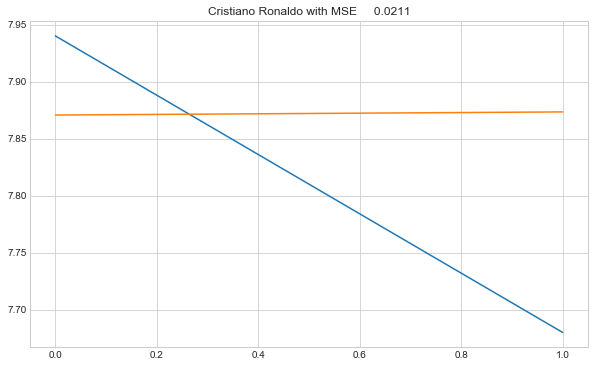

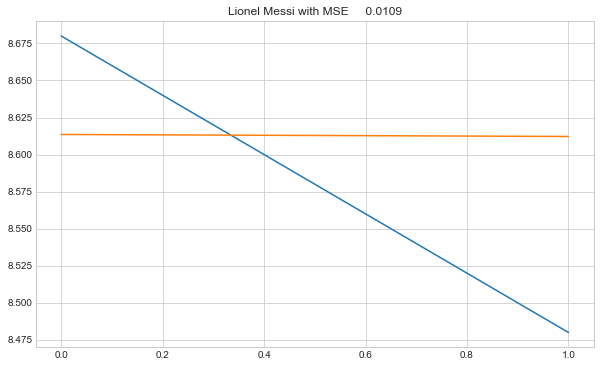

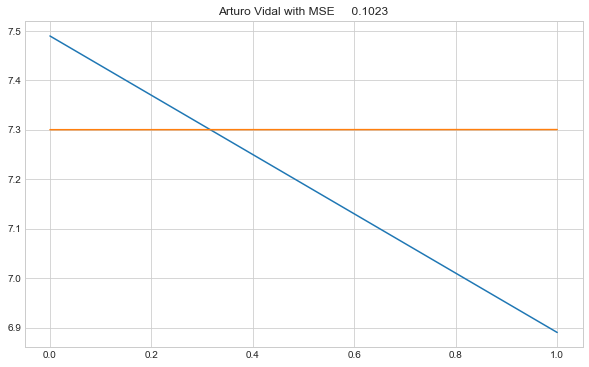

In [75]:
for i in playerList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    
    plt.figure(figsize=(10,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)